In [1]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

import time
from tqdm.notebook import tqdm
import requests
import utils.de_utils as de_utils

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

In [2]:
results_dir = 'data/validate_layers/'

In [3]:
figures_dir = f'validate_layers/figures/'
os.makedirs(figures_dir, exist_ok=True)

In [4]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [5]:
cluster_color = ['red', 'yellow', 'orange', 'green', 'purple', 'blue', 'olive', 'pink', 'brown']

In [6]:
os.listdir(results_dir)

['adultsDE',
 'adults_de.pkl',
 'adults_marker_genes.pkl',
 'annotation.csv',
 'chimpDE',
 'chimp_de.pkl',
 'expression.csv',
 'humanDE',
 'human_de.pkl',
 'macaqueDE',
 'macaque_de.pkl']

## Load files

### Load pseudobulk files

In [7]:
pb_dir_path = 'data/pseudobulks/'

In [8]:
os.listdir('data/pseudobulks/')

['pb_age.h5ad',
 'pb_chimp.h5ad',
 'pb_human.h5ad',
 'pb_macaque.h5ad',
 'pb_mammals.h5ad',
 'pb_spatial_libd_human.h5ad',
 'pseudobulk_all_four.h5ad',
 'pseudobulk_all_mammals.h5ad',
 'pseudobulk_humans.h5ad']

### DE results

In [9]:
os.listdir(results_dir + 'humanDE')

['degenes_L1.csv',
 'degenes_L2.csv',
 'degenes_L3.csv',
 'degenes_L4.csv',
 'degenes_L5.csv',
 'degenes_L6.csv',
 'degenes_WM.csv']

In [10]:
human_de = {layer:pd.read_csv(results_dir + f'humanDE/degenes_{layer}.csv', index_col=0) for layer in layers}
chimp_de = {layer:pd.read_csv(results_dir + f'chimpDE/degenes_{layer}.csv', index_col=0) for layer in layers}
macaque_de = {layer:pd.read_csv(results_dir + f'macaqueDE/degenes_{layer}.csv', index_col=0) for layer in layers}
adults_de = {layer:pd.read_csv(results_dir + f'adultsDE/degenes_{layer}.csv', index_col=0) for layer in layers}

# Explore the results

## Load files

In [11]:
import pickle

with open(f"{results_dir}/human_de.pkl", "rb") as file:
    human_de = pickle.load(file)

with open(f"{results_dir}/chimp_de.pkl", "rb") as file:
    chimp_de = pickle.load(file)

with open(f"{results_dir}/macaque_de.pkl", "rb") as file:
    macaque_de = pickle.load(file)

with open(f"{results_dir}/adults_de.pkl", "rb") as file:
    adults_de = pickle.load(file)

## Compare markers between species

In [12]:
human_markers = {layer: df[(df.p_val_adj < 0.05)].index for layer, df in human_de.items()}
chimp_markers = {layer: df[(df.p_val_adj < 0.05)].index for layer, df in chimp_de.items()}
macaque_markers = {layer: df[(df.p_val_adj < 0.05)].index for layer, df in macaque_de.items()}
adults_markers = {layer: df[(df.p_val_adj < 0.05)].index for layer, df in adults_de.items()}

### Check marker genes for each layer

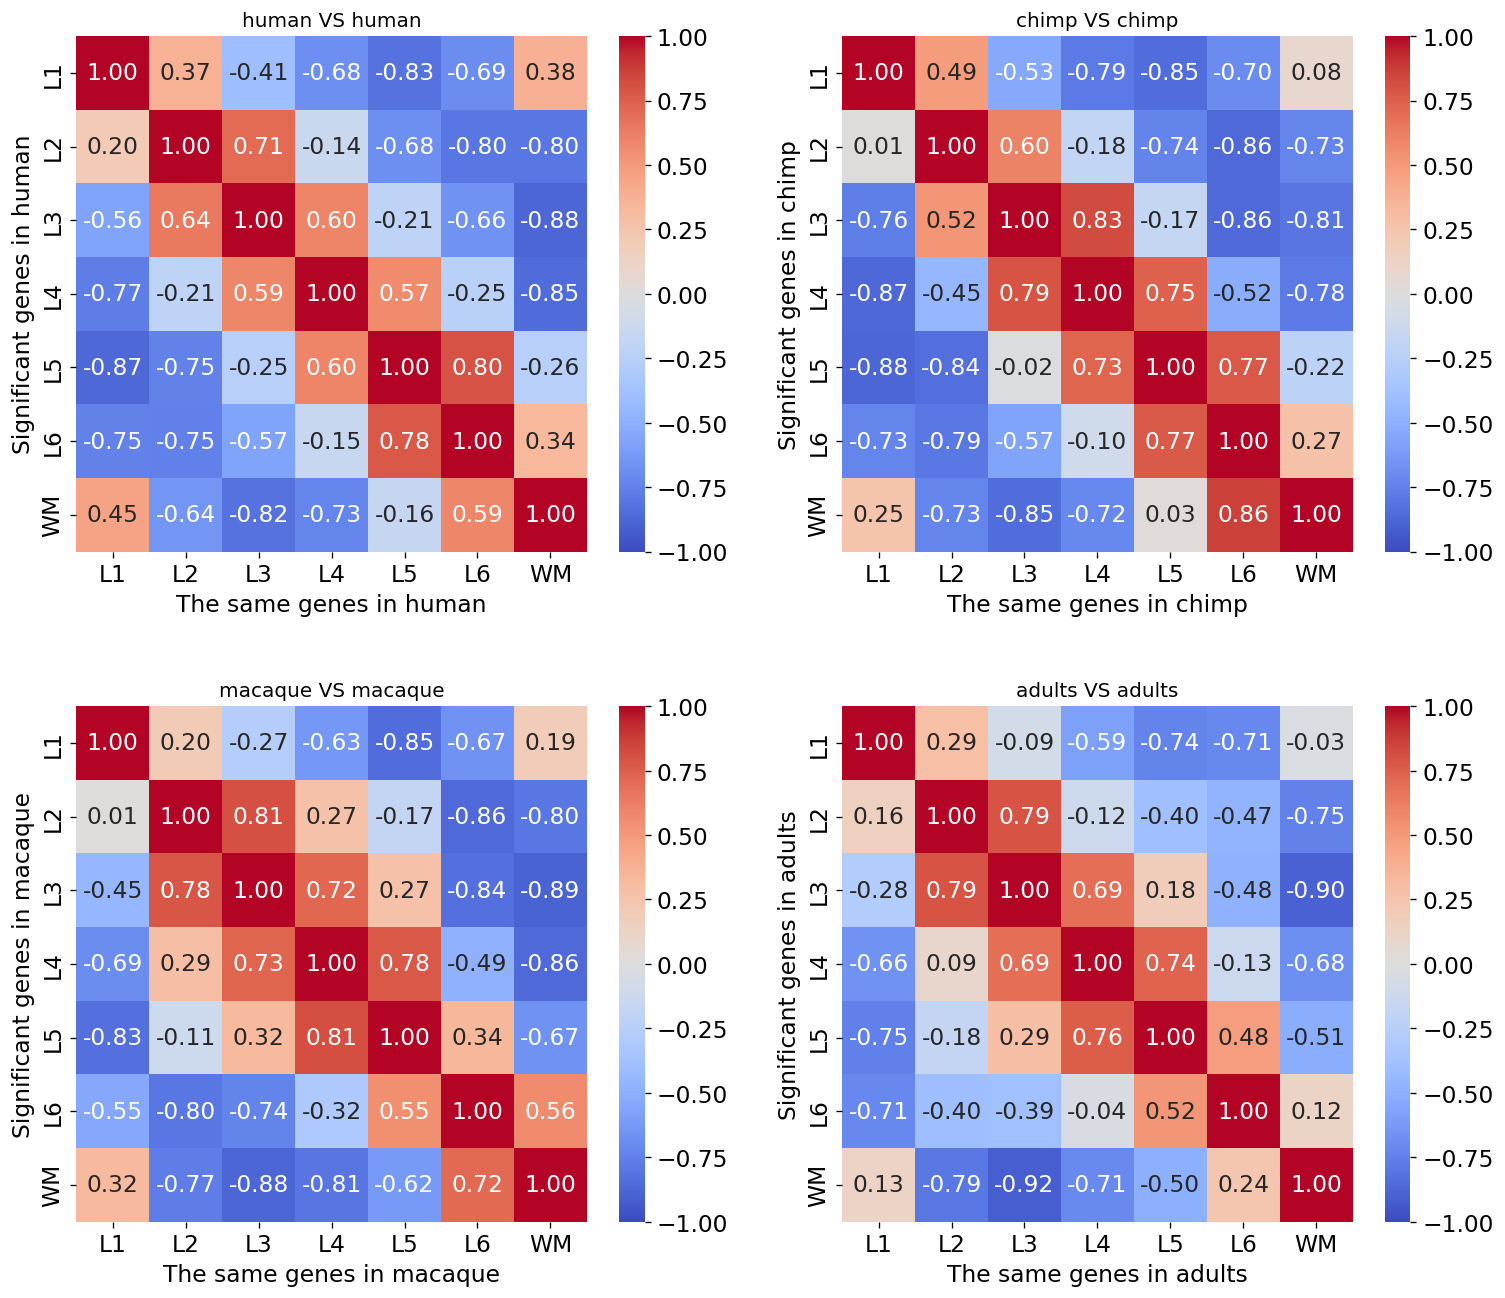

In [13]:
fig, axes = plt.subplots(2, 2,  figsize=(15, 13), gridspec_kw={'wspace': 0.2, 'hspace': 0.3}, dpi=60)
de_list = [human_de, chimp_de, macaque_de, adults_de]
species = ['human', 'chimp', 'macaque', 'adults']
de_genes = [human_markers, chimp_markers, macaque_markers, adults_markers]


for de_dict, genes, specie, ax in zip(de_list, de_genes, species, axes.flatten()):
    df = de_utils.corr_df(de_dict, de_dict, genes, ref_ind='', tar_ind='')
    sns.heatmap(df, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
    ax.set_title(f'{specie} VS {specie}', fontsize=12)
    ax.set_ylabel(f'Significant genes in {specie}')
    ax.set_xlabel(f'The same genes in {specie}')
    ax.grid(False)

In [14]:
human_markers_only = {layer: df[(df.p_val_adj < 0.05) & (df.logFC > 0)].index for layer, df in human_de.items()}
chimp_markers_only = {layer: df[(df.p_val_adj < 0.05) & (df.logFC > 0)].index for layer, df in chimp_de.items()}
macaque_markers_only = {layer: df[(df.p_val_adj < 0.05) & (df.logFC > 0)].index for layer, df in macaque_de.items()}
adults_markers_only = {layer: df[(df.p_val_adj < 0.05) & (df.logFC > 0)].index for layer, df in adults_de.items()}

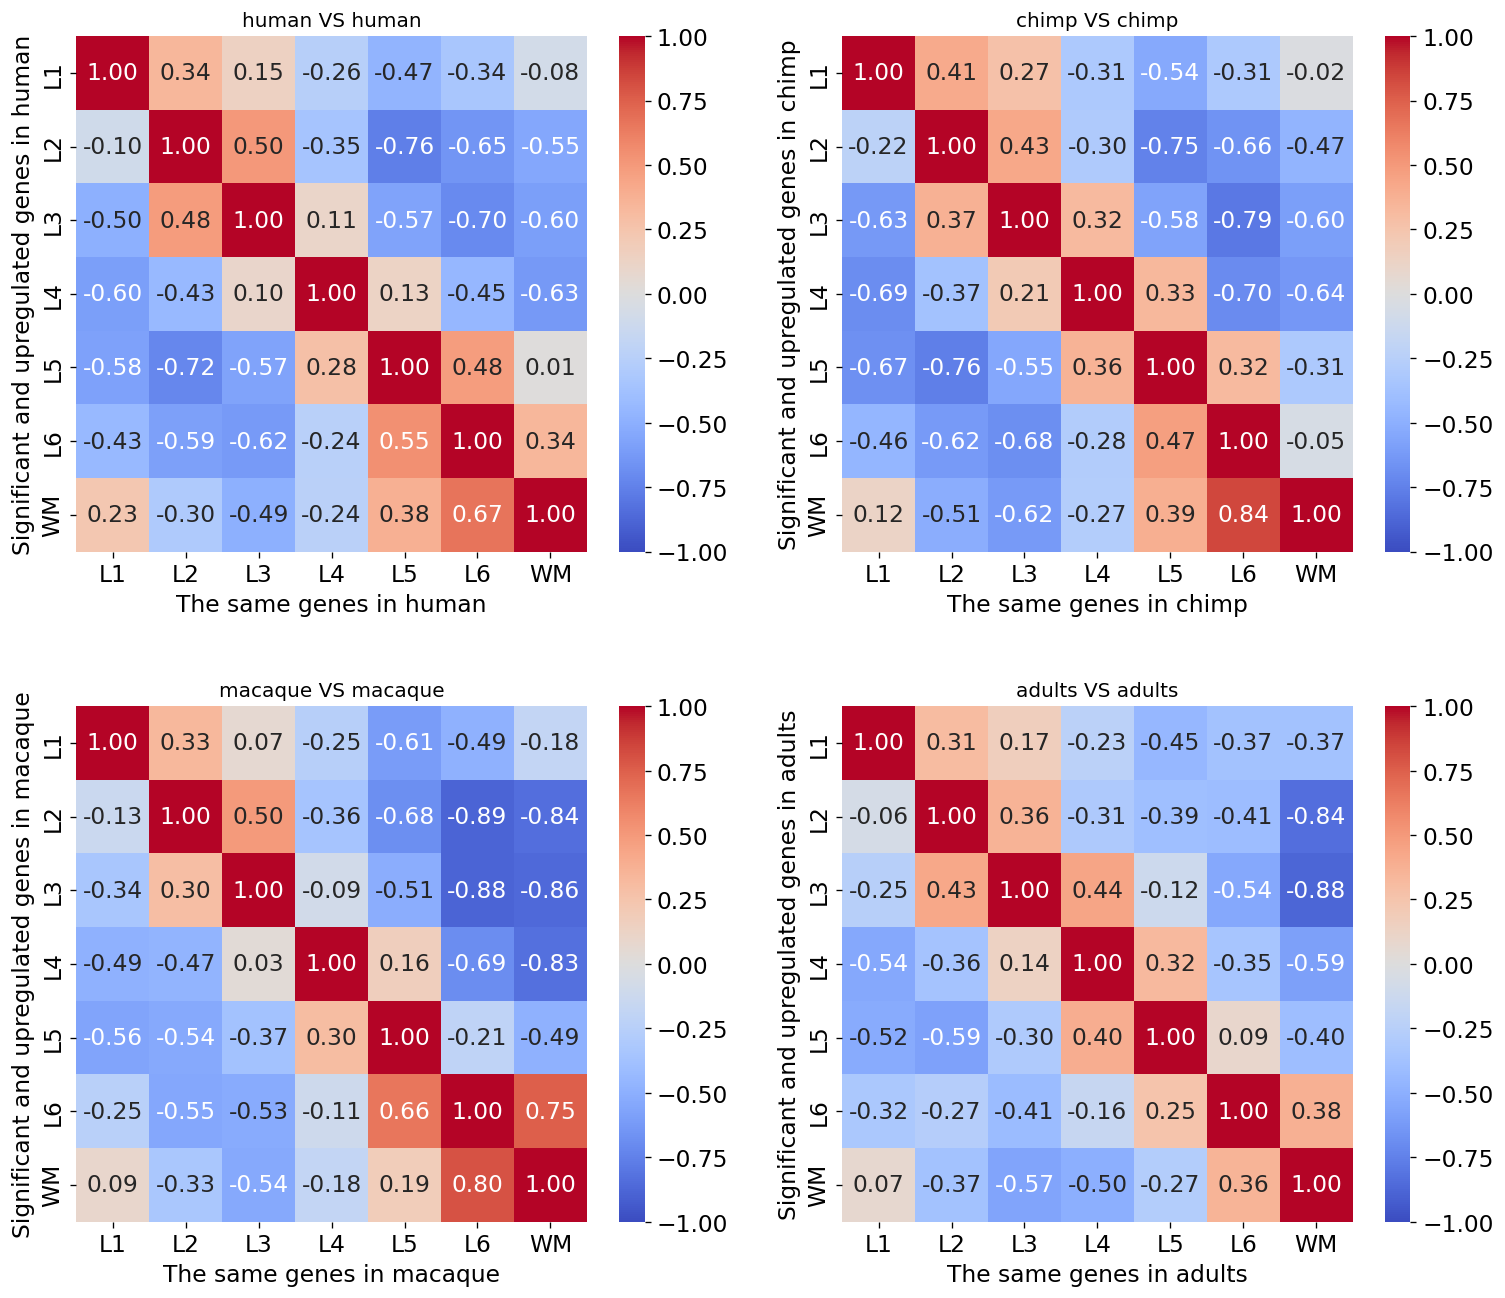

In [15]:
fig, axes = plt.subplots(2, 2,  figsize=(15, 13), gridspec_kw={'wspace': 0.2, 'hspace': 0.3}, dpi=60)
de_list = [human_de, chimp_de, macaque_de, adults_de]
species = ['human', 'chimp', 'macaque', 'adults']
marker_genes_only = [human_markers_only, chimp_markers_only, macaque_markers_only, adults_markers_only]


for de_dict, genes, specie, ax in zip(de_list, marker_genes_only, species, axes.flatten()):
    df = de_utils.corr_df(de_dict, de_dict, genes, ref_ind='', tar_ind='')
    sns.heatmap(df, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
    ax.set_title(f'{specie} VS {specie}', fontsize=12)
    ax.set_ylabel(f'Significant and upregulated genes in {specie}')
    ax.set_xlabel(f'The same genes in {specie}')
    ax.grid(False)

plt.savefig(figures_dir + 'inspecie_correlation.jpg', dpi=300, bbox_inches='tight')
plt.savefig(figures_dir + 'inspecie_correlation.pdf', dpi=300, bbox_inches='tight')

### Compare marker genes in adult humans for newborn samples 

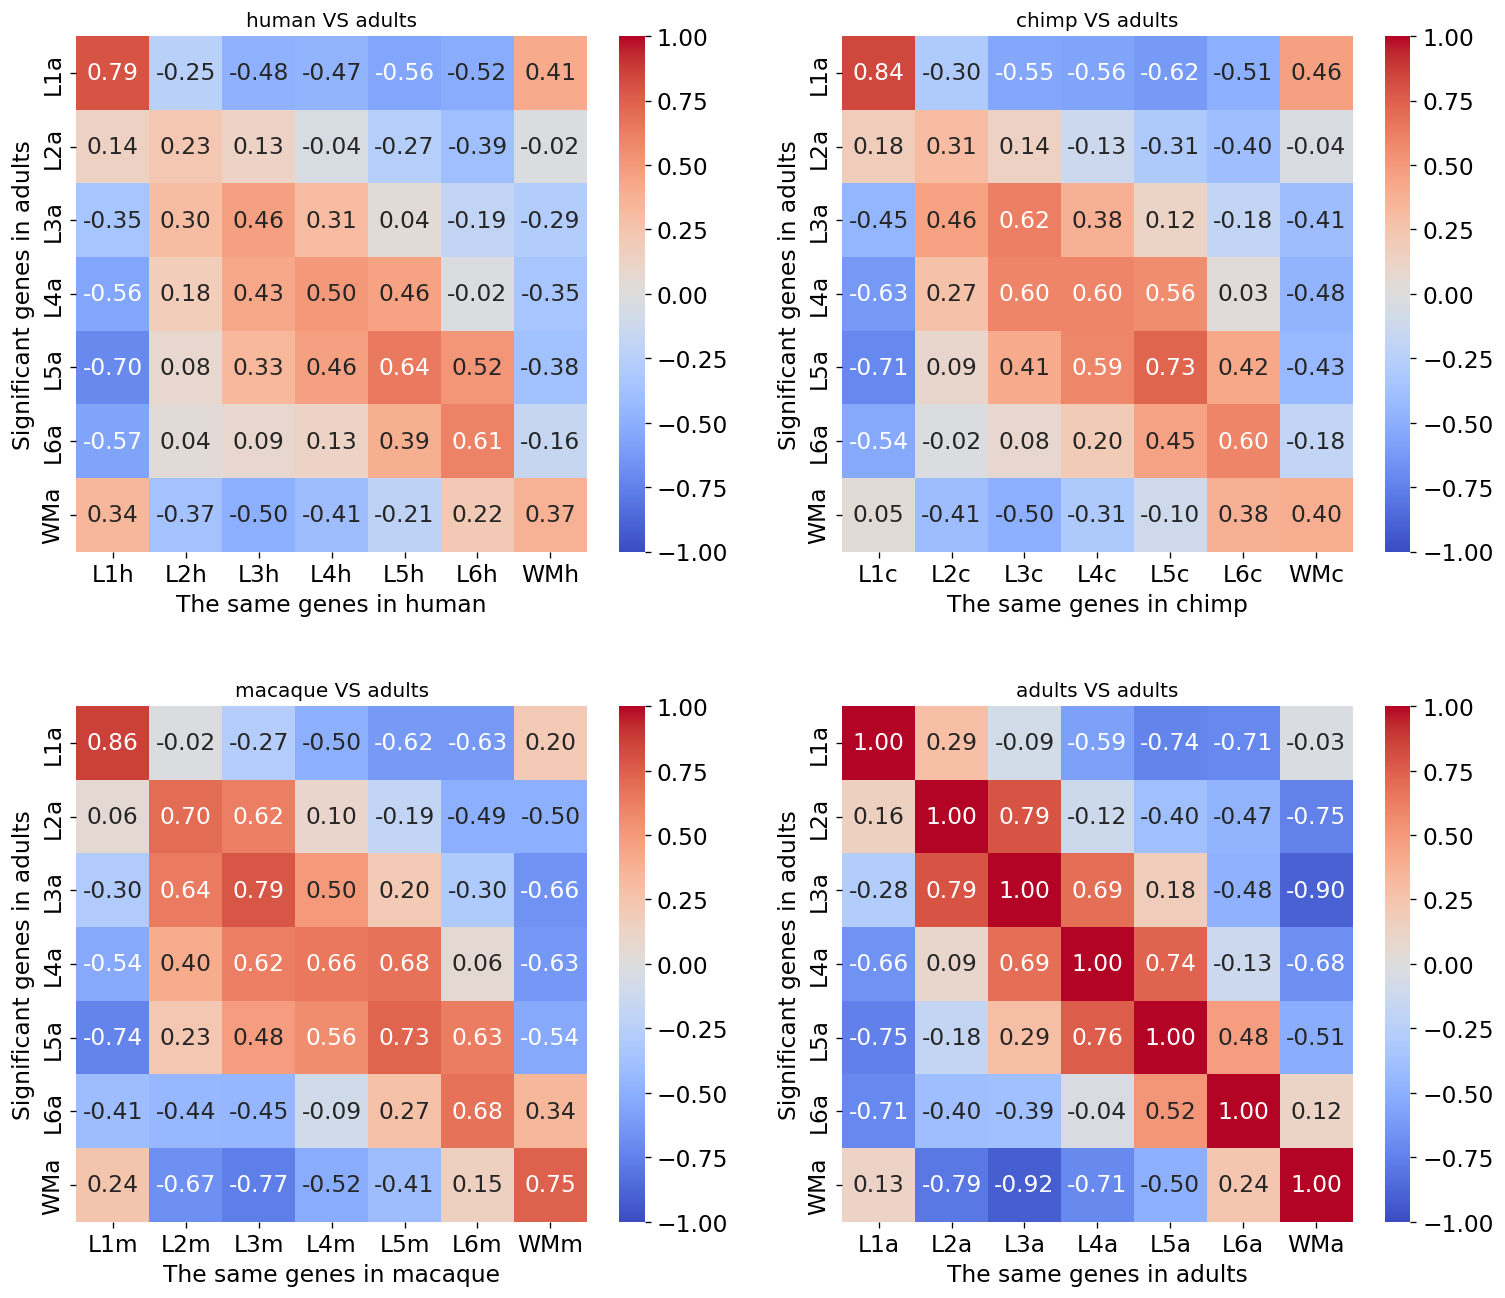

In [16]:
fig, axes = plt.subplots(2, 2,  figsize=(15, 13), gridspec_kw={'wspace': 0.2, 'hspace': 0.3}, dpi=60)
for de_dict, specie, ax in zip([human_de, chimp_de, macaque_de, adults_de], ['human', 'chimp', 'macaque', 'adults'], axes.flatten()):
    df = de_utils.corr_df(de_dict, adults_de, adults_markers, ref_ind=specie[0], tar_ind='a')
    sns.heatmap(df, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
    ax.set_title(f'{specie} VS adults', fontsize=12)
    ax.set_ylabel(f'Significant genes in adults')
    ax.set_xlabel(f'The same genes in {specie}')
    ax.grid(False)

plt.savefig(figures_dir + 'adults_correlation.jpg', dpi=300, bbox_inches='tight')
plt.savefig(figures_dir + 'adults_correlation.pdf', dpi=300, bbox_inches='tight')

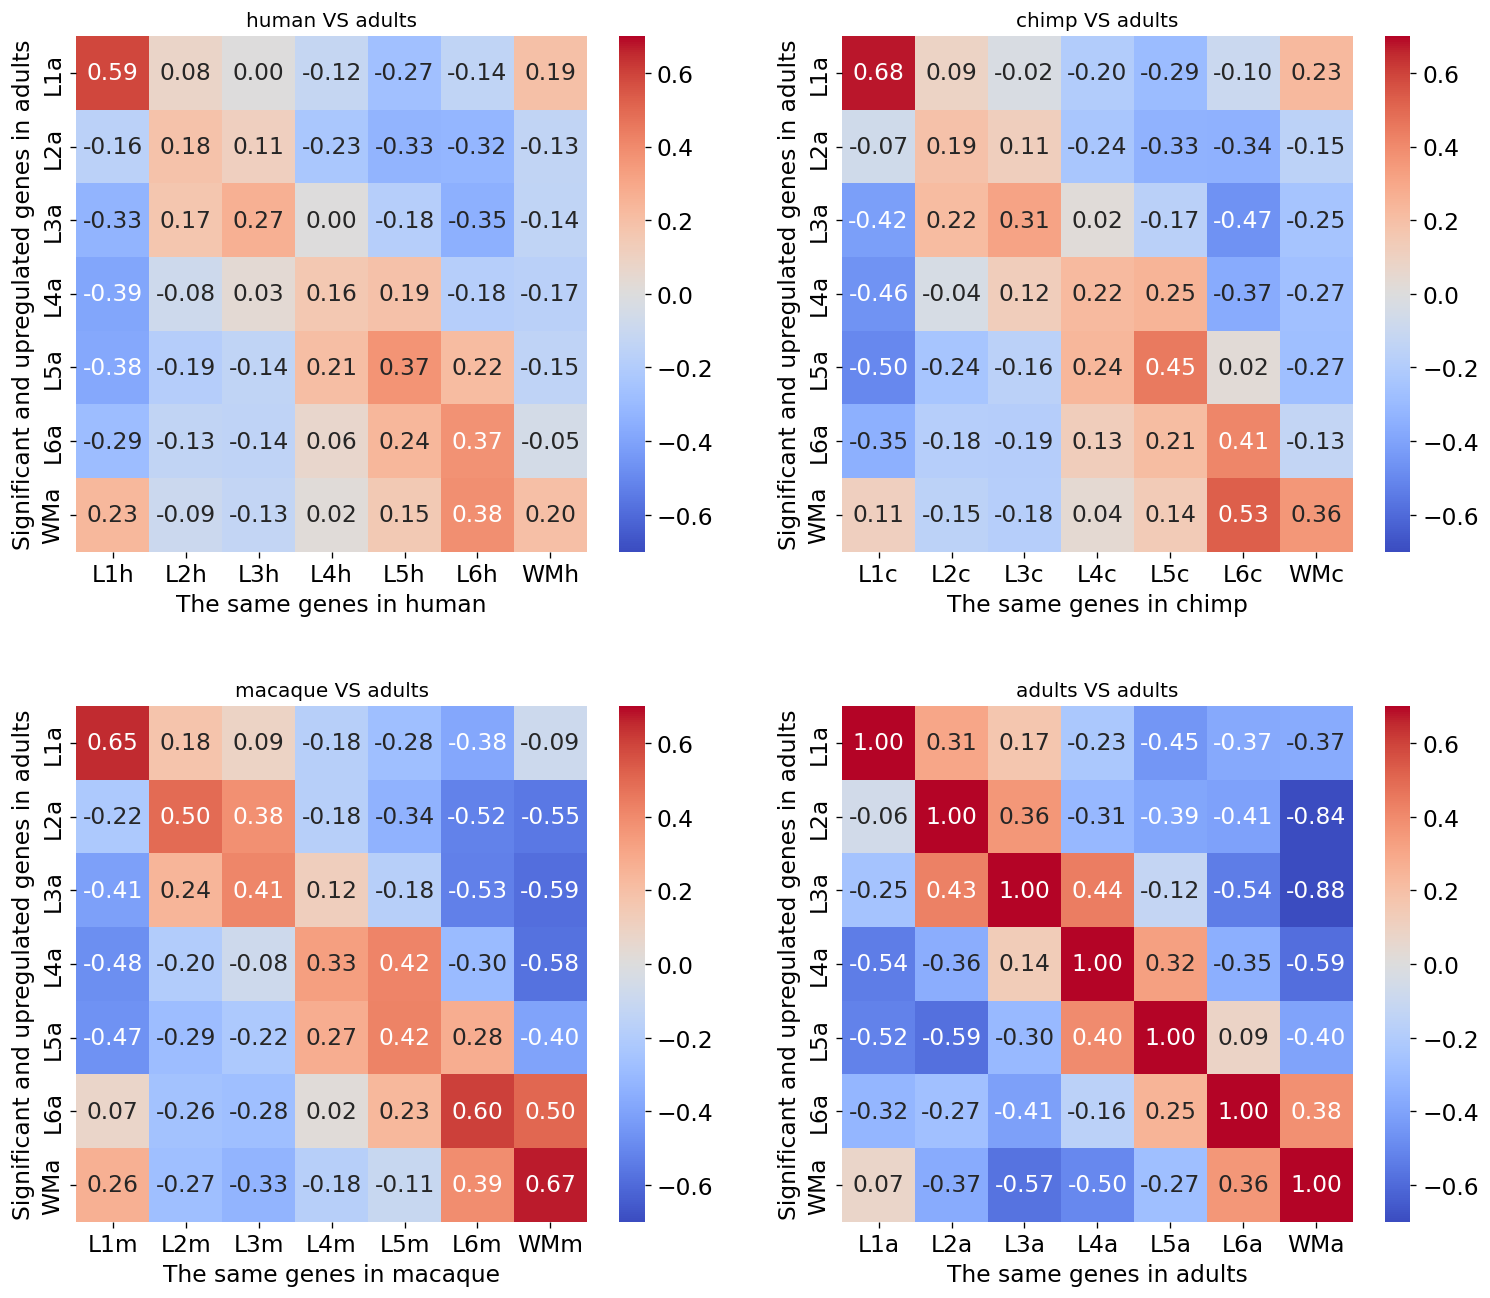

In [17]:
fig, axes = plt.subplots(2, 2,  figsize=(15, 13), gridspec_kw={'wspace': 0.2, 'hspace': 0.3}, dpi=60)
for de_dict, specie, ax in zip([human_de, chimp_de, macaque_de, adults_de], ['human', 'chimp', 'macaque', 'adults'], axes.flatten()):
    df = de_utils.corr_df(de_dict, adults_de, adults_markers_only, ref_ind=specie[0], tar_ind='a')
    sns.heatmap(df, annot=True, fmt=".2f", vmin=-0.7, vmax=0.7, cmap='coolwarm', center=0, ax=ax)
    ax.set_title(f'{specie} VS adults', fontsize=12)
    ax.set_ylabel(f'Significant and upregulated genes in adults')
    ax.set_xlabel(f'The same genes in {specie}')
    ax.grid(False)

### Compare newborn human marker genes

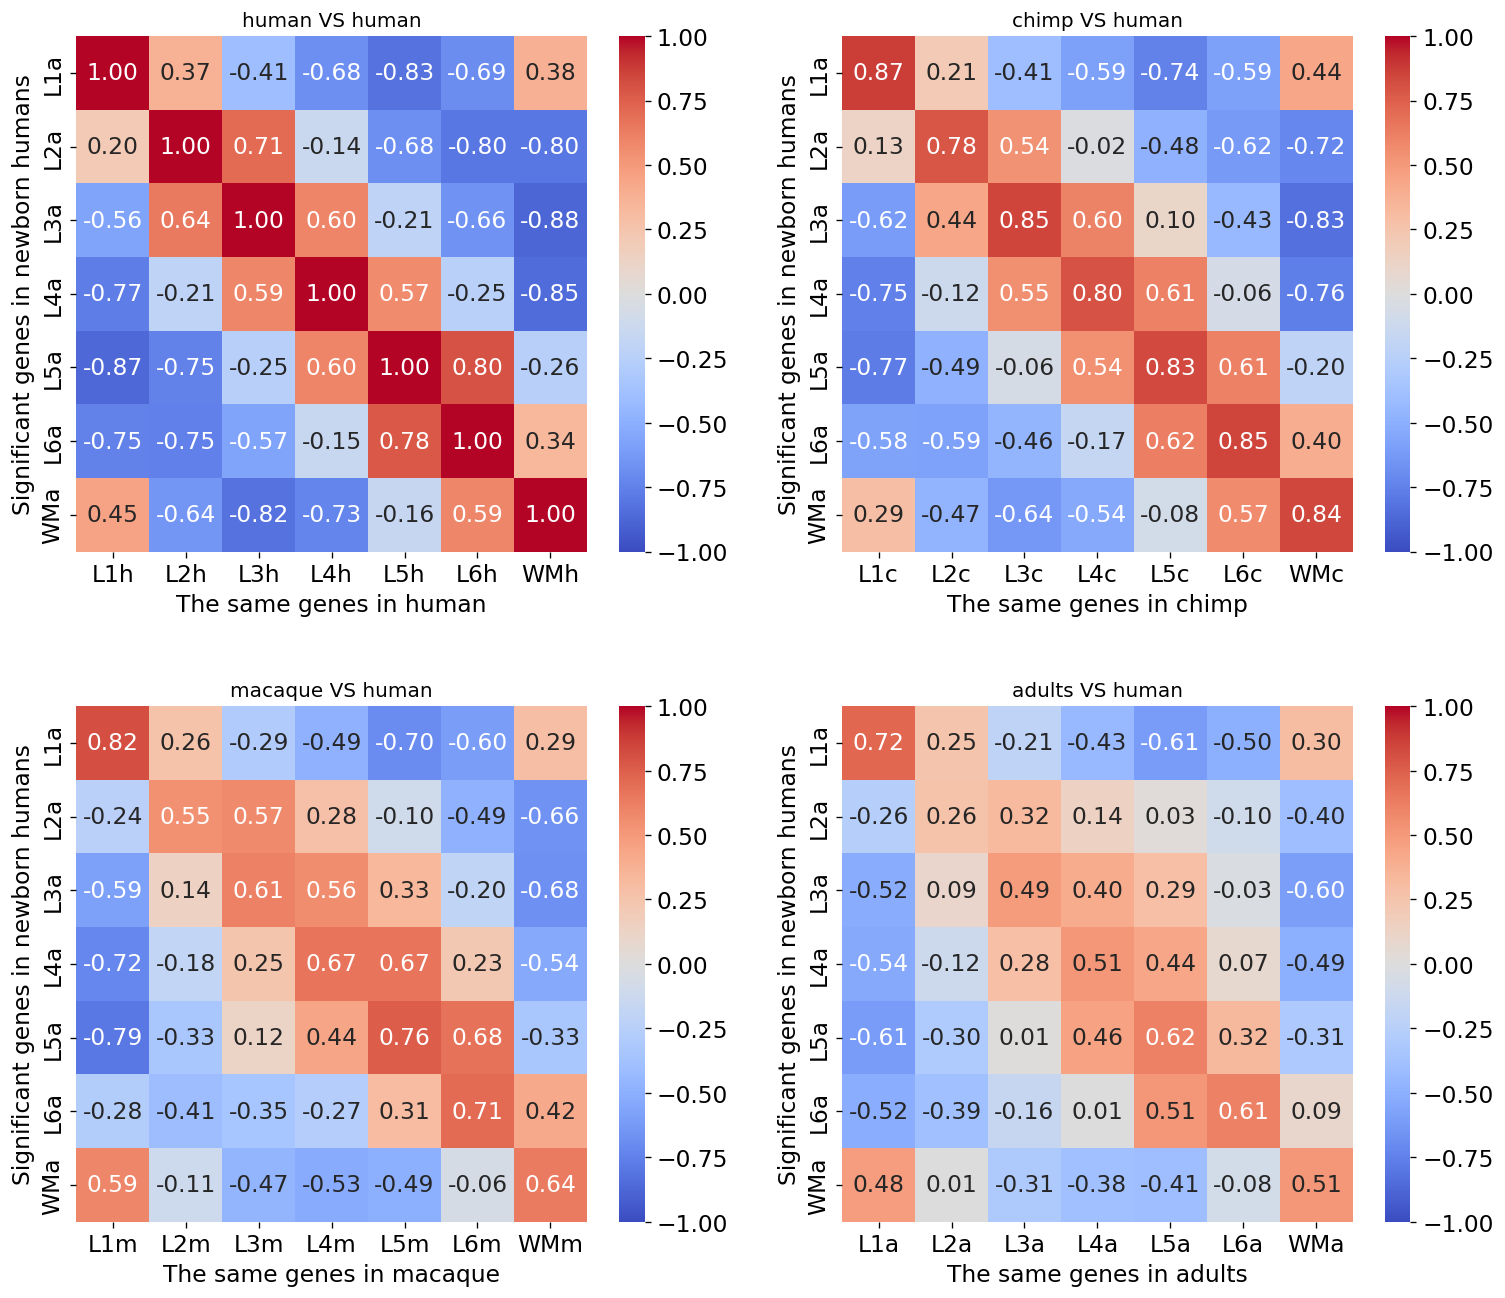

In [18]:
fig, axes = plt.subplots(2, 2,  figsize=(15, 13), gridspec_kw={'wspace': 0.2, 'hspace': 0.3}, dpi=60)
for de_dict, specie, ax in zip([human_de, chimp_de, macaque_de, adults_de], ['human', 'chimp', 'macaque', 'adults'], axes.flatten()):
    df = de_utils.corr_df(de_dict, human_de, human_markers, ref_ind=specie[0], tar_ind='a')
    sns.heatmap(df, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
    ax.set_title(f'{specie} VS human', fontsize=12)
    ax.set_ylabel(f'Significant genes in newborn humans')
    ax.set_xlabel(f'The same genes in {specie}')
    ax.grid(False)

plt.savefig(figures_dir + 'newbornhuman_correlation.jpg', dpi=300, bbox_inches='tight')
plt.savefig(figures_dir + 'newbornhuman_correlation.pdf', dpi=300, bbox_inches='tight')

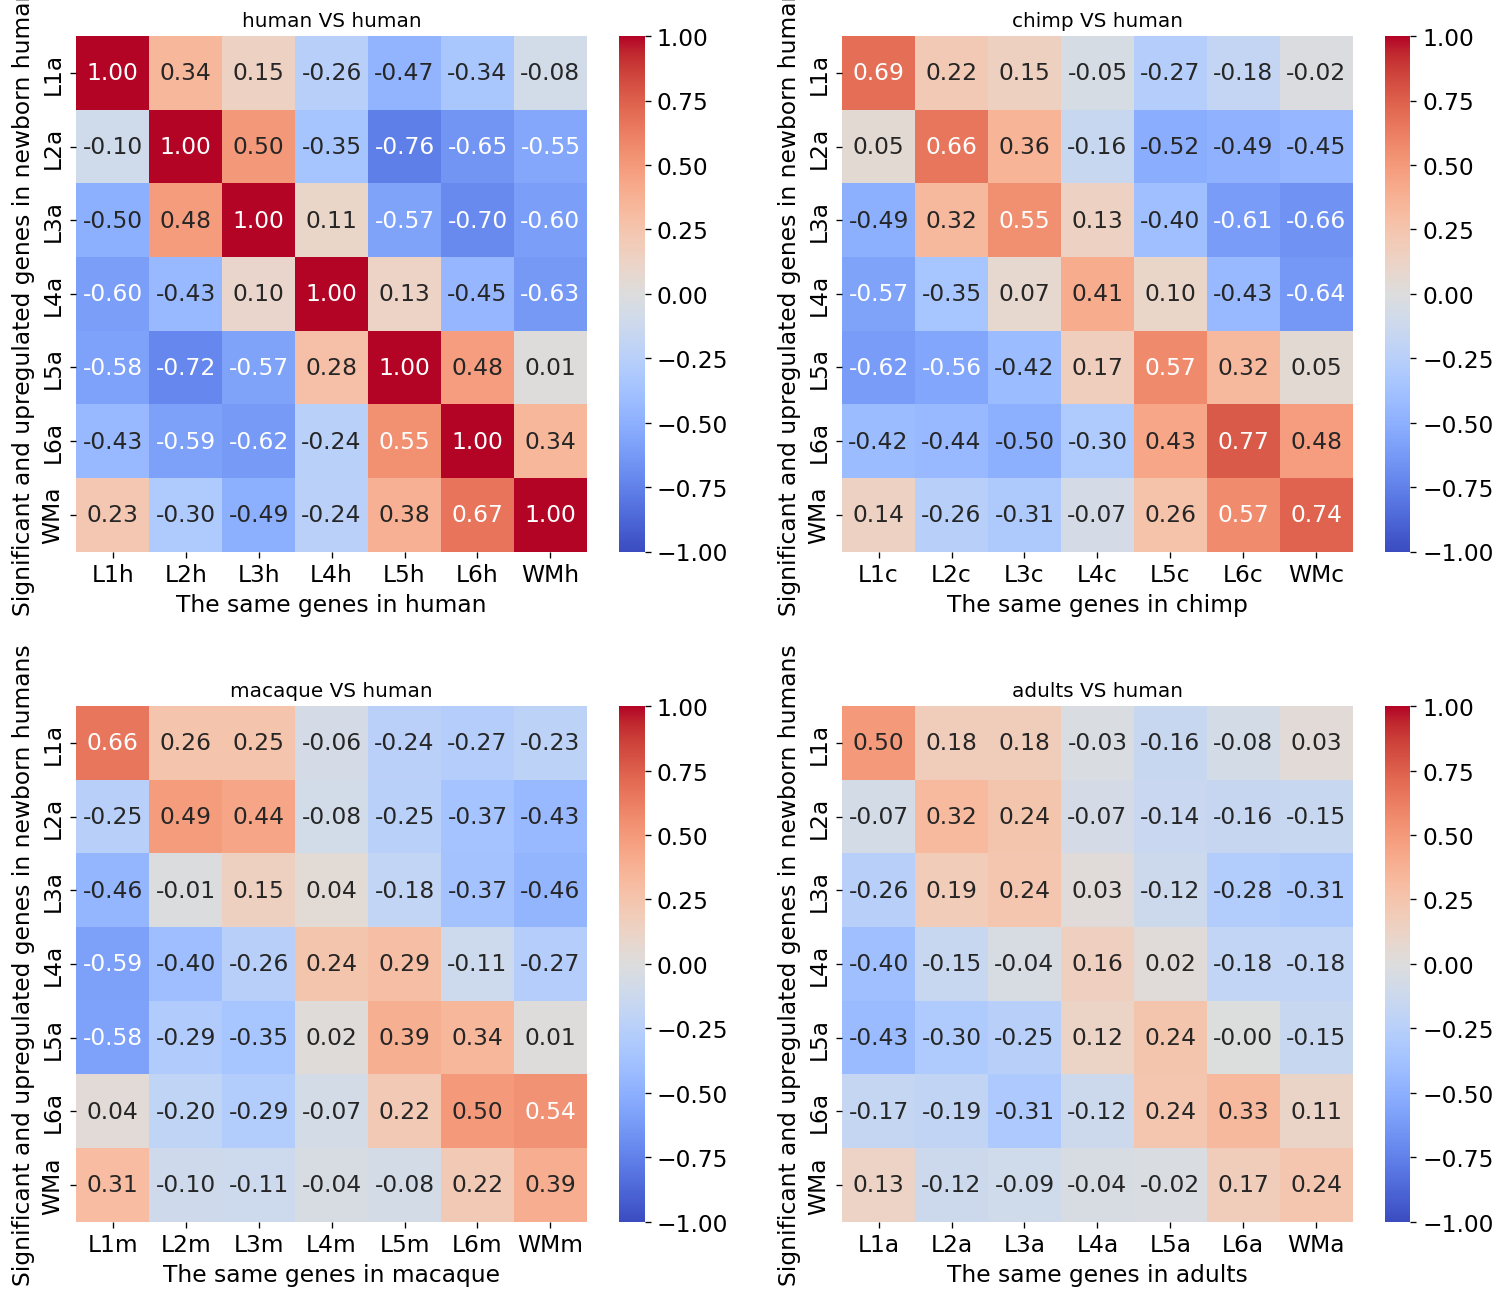

In [19]:
fig, axes = plt.subplots(2, 2,  figsize=(15, 13), gridspec_kw={'wspace': 0.2, 'hspace': 0.3}, dpi=60)
for de_dict, specie, ax in zip([human_de, chimp_de, macaque_de, adults_de], ['human', 'chimp', 'macaque', 'adults'], axes.flatten()):
    df = de_utils.corr_df(de_dict, human_de, human_markers_only, ref_ind=specie[0], tar_ind='a')
    sns.heatmap(df, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
    ax.set_title(f'{specie} VS human', fontsize=12)
    ax.set_ylabel(f'Significant and upregulated genes in newborn humans')
    ax.set_xlabel(f'The same genes in {specie}')
    ax.grid(False)